In [9]:
import datetime
import pandas as pd
import numpy as np
TRAIN_DATA_PATH = "./data/Metro_train/"
TEST_DATA_PATH = "./data/Metro_testA/"

In [11]:
train,test = load_data()
datestart = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
date_list = []
for i in range(25):
    date_list.append(str(datestart)[0:10])
    datestart += datetime.timedelta(days=+1)
date_list.append("2019-01-28")
inout_train = pd.DataFrame()
for record_date in date_list:
    if record_date == "2019-01-28":
        recoreds = pd.read_csv(TEST_DATA_PATH + f'testA_record_{record_date}.csv', encoding="utf-8")
    else:
        recoreds = pd.read_csv(TRAIN_DATA_PATH + f'record_{record_date}.csv', encoding="utf-8")
    print(recoreds.columns)
    break;


Index(['time', 'lineID', 'stationID', 'deviceID', 'status', 'userID',
       'payType'],
      dtype='object')


In [12]:
recoreds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539592 entries, 0 to 2539591
Data columns (total 7 columns):
time         object
lineID       object
stationID    int64
deviceID     int64
status       int64
userID       object
payType      int64
dtypes: int64(4), object(3)
memory usage: 135.6+ MB


In [13]:
recoreds.head(10)

,time,lineID,stationID,deviceID,status,userID,payType
0,2019-01-01 02:00:05,B,27,1354,0,D13f76f42c9a677c4add94d9e480fb5c5,3
1,2019-01-01 02:01:40,B,5,200,1,D9a337d37d9512184b8e3fd477934b293,3
2,2019-01-01 02:01:53,B,5,247,0,Dc9e179298617f40b782490c1f3e2346c,3
3,2019-01-01 02:02:38,B,5,235,0,D9a337d37d9512184b8e3fd477934b293,3
4,2019-01-01 02:03:42,B,23,1198,0,Dd1cde61886c23fdb7ef1fdb76c9b1234,3
5,2019-01-01 02:04:11,B,3,109,0,D7a8fc96cbc11e5df389aa45a62870a48,3
6,2019-01-01 02:04:45,B,27,1354,1,D13f76f42c9a677c4add94d9e480fb5c5,3
7,2019-01-01 02:05:02,B,4,141,0,D3951ac47cb9911c7adca0f23a9eb9bf2,3
8,2019-01-01 02:05:20,B,23,1198,0,Db5682ca9db937733e95db27b959e62a1,3
9,2019-01-01 02:05:34,B,20,1036,1,D01d6584e23de32f8225c756f4c3add76,3


In [17]:
#查看每个日期的出行情况
train = pd.read_csv(TEMP_DATA_PATH+"inout_train.csv", encoding="utf-8")
train['date'] = train.apply(lambda row: row['startTime'].split(' ')[0], axis=1)
train['time'] = train.apply(lambda row: row['startTime'].split(' ')[1], axis=1)
train.head()

,stationID,startTime,endTime,inNums,outNums,date,time
0,0,2019-01-01 05:30:00,2019-01-01 05:40:00,1,0,2019-01-01,05:30:00
1,0,2019-01-01 05:40:00,2019-01-01 05:50:00,4,0,2019-01-01,05:40:00
2,0,2019-01-01 05:50:00,2019-01-01 06:00:00,3,1,2019-01-01,05:50:00
3,0,2019-01-01 06:00:00,2019-01-01 06:10:00,17,0,2019-01-01,06:00:00
4,0,2019-01-01 06:10:00,2019-01-01 06:20:00,21,0,2019-01-01,06:10:00


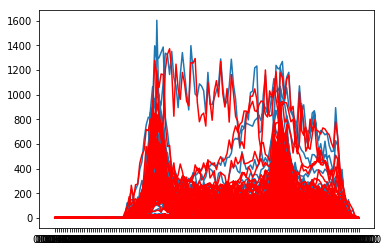

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train[train['date']=='2019-01-21']['time'], train[train['date']=='2019-01-21']['inNums'])
plt.plot(train[train['date']=='2019-01-28']['time'], train[train['date']=='2019-01-28']['inNums'],color="r")
#plt.plot(train[train['date']=='2019-01-15']['time'], train[train['date']=='2019-01-15']['inNums'],color="b")
plt.show()
